In [1]:
import pandas as pd
import numpy as np
from collections import defaultdict
import csv
import nltk
from matplotlib import pyplot as plt
import os
import re
import warnings
import random
warnings.filterwarnings('ignore')
from collections import Counter,defaultdict
from nltk import word_tokenize
from math import log
import string
import pickle
from math import log
import gensim
from gensim import corpora
from gensim import models
from string import digits
from collections import defaultdict
import ast
cwd = os.getcwd()

In [2]:
osname = os.name
if osname =='Windows':
    sym = "//"
else:
    sym = "/"

In [3]:
r_path=cwd+sym+'nips_reviewer_data'+sym+'reviewers.txt'
review_df=pd.read_csv(r_path,sep='\t',header=None)
review_df.columns=['sno','name']
review_lt=list(review_df.name)
review_sno={val:ind for ind,val in enumerate(review_lt)}

## Merging 2 Aminer retrieved data

In [4]:
with open('data.pkl','rb') as f:
    data=pickle.load(f)
f.close()

In [5]:
with open('addn.pkl','rb') as f:
    n_data=pickle.load(f)
f.close()

In [6]:
key=list(data.keys())
for val in key:
    for item in n_data[val]:
        #print('Yo')
        data[val].append(item)

In [7]:
data_df=pd.DataFrame.from_dict(data)

## Data Statistics

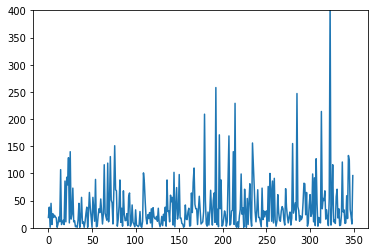

350


In [8]:
data_df.groupby('author').count()['id']
ct=list(data_df.groupby('author').count()['id'])
avail=list(data_df.groupby('author').count().index)
ctr=0
ind_lt=[]
for ind,val in enumerate(ct):
    if val<10:
        ind_lt.append([val,ind])
        ctr+=1
    
n=len(ct)
x=[i for i in range(n)]
plt.ylim(0, 400)
plt.plot(x,ct)
plt.show()
print(n)


In [9]:
ctr

89

In [10]:
ind_lt.sort()

In [11]:
ind_lt

[[1, 2],
 [1, 10],
 [1, 33],
 [1, 36],
 [1, 41],
 [1, 45],
 [1, 50],
 [1, 107],
 [1, 119],
 [1, 155],
 [1, 216],
 [1, 218],
 [1, 224],
 [1, 227],
 [2, 31],
 [2, 55],
 [2, 99],
 [2, 103],
 [2, 128],
 [2, 145],
 [2, 195],
 [2, 244],
 [2, 251],
 [3, 32],
 [3, 56],
 [3, 79],
 [3, 85],
 [3, 94],
 [3, 106],
 [3, 135],
 [3, 156],
 [3, 162],
 [3, 182],
 [3, 199],
 [3, 204],
 [3, 215],
 [3, 233],
 [3, 261],
 [3, 297],
 [3, 309],
 [4, 91],
 [4, 102],
 [4, 131],
 [4, 163],
 [4, 306],
 [4, 321],
 [4, 334],
 [5, 101],
 [5, 104],
 [5, 143],
 [5, 184],
 [5, 188],
 [5, 200],
 [5, 208],
 [5, 271],
 [5, 278],
 [5, 324],
 [5, 335],
 [6, 4],
 [6, 15],
 [6, 18],
 [6, 171],
 [6, 193],
 [6, 213],
 [6, 229],
 [7, 11],
 [7, 62],
 [7, 74],
 [7, 98],
 [7, 113],
 [7, 129],
 [7, 154],
 [7, 175],
 [7, 181],
 [7, 209],
 [7, 348],
 [8, 39],
 [8, 95],
 [8, 153],
 [8, 329],
 [8, 340],
 [9, 24],
 [9, 117],
 [9, 127],
 [9, 176],
 [9, 258],
 [9, 275],
 [9, 312],
 [9, 341]]

In [12]:
data_df.groupby('year').count()

id  author  title  abstract  venue
year                                       
-1     1848    1848   1848      1848   1848
 1995   460     460    460       460    460
 1996   512     512    512       512    512
 1997   666     666    666       666    666
 1998   797     797    797       797    797
 1999   934     934    934       934    934
 2000   952     952    952       952    952
 2001  1066    1066   1066      1066   1066
 2002  1316    1316   1316      1316   1316
 2003  1457    1457   1457      1457   1457
 2004  1558    1558   1558      1558   1558
 2005  1807    1807   1807      1807   1807

In [65]:
no_rec=set(review_lt)-set(avail)
no_rec=list(no_rec)
for ele in ind_lt:
    no_rec.append(review_lt[ele[1]])

In [66]:
len(no_rec)

103

In [13]:
data_df

id              author  \
0      53e99f9bb7602d970286e73d         Alan Murray   
1      53e99f9bb7602d9702870afd         Alan Murray   
2      53e99f9bb7602d9702870cfb       David Forsyth   
3      53e99f9bb7602d9702871a1e      Ingo Steinwart   
4      53e99f9bb7602d9702872b1d       David Forsyth   
5      53e99fa2b7602d97028766c6    Olivier Bousquet   
6      53e99fa2b7602d97028766c6  Ulrike von Luxburg   
7      53e99fa2b7602d9702876c93      Charles Sutton   
8      53e99fa2b7602d9702876c93     Andrew McCallum   
9      53e99fa2b7602d9702877b0d     Dale Schuurmans   
10     53e99fa2b7602d9702879b46        Kevin Murphy   
11     53e99fa8b7602d970287c086              Ji Zhu   
12     53e99fa8b7602d970287cdb6      Kenji Fukumizu   
13     53e99fa8b7602d970287d290          John Moody   
14     53e99fa9b7602d970287ec03     Michael Schmitt   
15     53e99fa9b7602d970287ec4b          Colin Fyfe   
16     53e99fa9b7602d970287f042   Gert Cauwenberghs   
17     53e99fa9b7602d9702880a84       Amnon Shashua   
18     53e99fa9b7602d97028811ac       Ralf Herbrich   
19     53e99fa9b7602d97028811ac       Thore Graepel   
20     53e99fa9b7602d97028811ac     Klaus Obermayer   
21     53e99fa9b7602d9702882511      Trevor Darrell   
22     53e99fa9b7602d97028831c1   Robert Williamson   
23     53e99fafb7602d970288434e        Kevin Murphy   
24     53e99fafb7602d970288434e          Yair Weiss   
25     53e99fafb7602d97028859cb         Sven Koenig   
26     53e99fafb7602d9702885e6c      Serge Belongie   
27     53e99fafb7602d9702887405      Thomas Gartner   
28     53e99fafb7602d9702889450             Li Deng   
29     53e99fafb7602d9702889550    Andrew Zisserman   
...                         ...                 ...   
13343                    840966       Dengyong Zhou   
13344                   1676332       Dengyong Zhou   
13345                    840941      Edward Snelson   
13346                   1672478      Edward Snelson   
13347                    520517     Nicolas Vayatis   
13348                    563268     Nicolas Vayatis   
13349                    734928     Nicolas Vayatis   
13350                   1705502     Nicolas Vayatis   
13351                    840872  Jean-Yves Audibert   
13352                   1705533  Jean-Yves Audibert   
13353                    303516     Tadashi Shibata   
13354                    499760     Tadashi Shibata   
13355                    760801     Tadashi Shibata   
13356                   1392783     Tadashi Shibata   
13357                    267160       Matthias Hein   
13358                    270233       Matthias Hein   
13359                    277776       Matthias Hein   
13360                    284740       Matthias Hein   
13361                    416575       Matthias Hein   
13362                    777379       Matthias Hein   
13363                    792876       Matthias Hein   
13364                    819720       Matthias Hein   
13365                    823191       Matthias Hein   
13366                    833711       Matthias Hein   
13367                    840536       Matthias Hein   
13368                    840872       Matthias Hein   
13369                    845472       Matthias Hein   
13370                    850014       Matthias Hein   
13371                   1346006       Matthias Hein   
13372                   1705533       Matthias Hein   

                                                   title  \
0      Adaptive Noisy Neural Computation in Mixed-mod...   
1      Geography 683 - Introduction to Geographic Ana...   
2      Achieve What We Want Them To? Interdependence ...   
3                Fast Rates to Bayes for Kernel Machines   
4      Primitives, Perceptual Organization and Object...   
5      Advanced Lectures On Machine Learning: ML Summ...   
6      Advanced Lectures On Machine Learning: ML Summ...   
7      Feature Bagging: Preventing Weight Undertraini...   
8      Feature Bagging: Preventing Weight Undertraini...   
9      Latent Maxi

In [14]:
data_df.to_pickle('data_df.pkl')

In [15]:
data_df.groupby('abstract').count()

id  author  title  year  \
abstract                                                                        
                                                    2915    2915   2915  2915   
\n A critical component of mobile robot systems...     1       1      1     1   
\n A large-margin learning machine for sparse p...     2       2      2     2   
\n A new enhancement of ransac, the locally opt...     1       1      1     1   
\n A novel approach to feature selection is pre...     1       1      1     1   
\n A statistical generative model for the speec...     1       1      1     1   
\n Aimed at coordinated resource sharing in dis...     1       1      1     1   
\n Although Reinforcement Learning methods have...     1       1      1     1   
\n By means of data statistics, comparative ana...     1       1      1     1   
\n Can the organization of local edge measureme...     1       1      1     1   
\n Computational linguistics studies the comput...     1       1      1     1   
\n Die Geburtsstunde des Elektroenzephalogramms...     1       1      1     1   
\n Eigenvector based methods in general, and Go...     1       1      1     1   
\n Existing methods for incorporating subspace ...     1       1      1     1   
\n Here we accelerate computations that reduce ...     1       1      1     1   
\n I want to try to do two things. The first is...     1       1      1     1   
\n If data in ℝ\n d\n  actually lie in a linear...     1       1      1     1   
\n In connection with two-label classification ...     1       1      1     1   
\n In information retrieval, feedback provided ...     1       1      1     1   
\n In my lecture I want to sketch a new branch ...     1       1      1     1   
\n In previous chapters, we saw the application...     1       1      1     1   
\n In this chapter, we describe one of our earl...     1       1      1     1   
\n In this paper we describe the application of...     1       1      1     1   
\n In this paper we discuss the use of concepts...     1       1      1     1   
\n In this paper we present a boosting approach...     2       2      2     2   
\n In this paper, we advocate the use of Sparse...     1       1      1     1   
\n In this paper, we create a simple artificial...     1       1      1     1   
\n In this paper, we discuss a family of new Au...     1       1      1     1   
\n In this paper, we focus on the problem of pr...     1       1      1     1   
\n In this paper, we investigate the multi-laye...     1       1      1     1   
...                                                  ...     ...    ...   ...   
singer identification, singing voice detection,...     1       1      1     1   
sources and outputs scores (log-likelihoods) fo...     1       1      1     1   
svlab is an extensible, object oriented, packag...     1       1      1     1   
ther evaluation and follow-up care. Using the r...     1       1      1     1   
this paper was partially published in the Proce...     1       1      1     1   
those reported in microwave studies. The excite...     1       1      1     1   
uo- rescent imaging methods permit experimental...     1       1      1     1   
verkorte weergave  The relationship between sub...     1       1      1     1   
{[Ag(ATO)2]Cl04}n was prepared by mixing the aq...     1       1      1     1   
  \n We tested the hypothesis that sequential m...     1       1      1     1   
ó Autonomous navigation in outdoor, off-road en...     1       1      1     1   
ó Because of the difculty of interpreting laser...     1       1      1     1   
ó Finding appropriate stable grasps for a hand ...     1       1      1     1   
ó In this paper, we address the problem of ndin...     1       1      1     1   
ó It is well-known that the Kalman lter for sim...     1       1      1     1   
ó One of the main applications of mobile robots...     1       1      1     1   
ó Random nite sets are natural representations ...     1       1      1     1   
ó Th

## Cleaning Text

In [17]:
from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer
st = set(stopwords.words('english'))
from nltk.stem import WordNetLemmatizer 
import re

def cleantext(text):
    
    remove_digits = str.maketrans('', '', digits)
    text = text.translate(remove_digits)
    
    # remove punctuation
    table = str.maketrans(string.punctuation, ' '*len(string.punctuation))
    strip = text.translate(table)
    
    
    # Tokenizer
    tokens = word_tokenize(strip)
    
    # Convert into lower case 
    proc_text = [w.lower() for w in tokens]
    
    # Remove stopwords
    proc_text = [word for word in proc_text if word not in st]
    
    
    #Storing only Lemmmatized words
    lemmatizer=WordNetLemmatizer()
    lemma_text=[lemmatizer.lemmatize(word) for word in proc_text]

    return " ".join(lemma_text)


t = "i am groot2'7"    
cleantext(t)

'groot'

## LDA Model for titles

### Training

In [4]:
data_df=pd.read_pickle('data_df.pkl')

In [15]:
from gensim.models import LdaModel
from gensim import models

title_list=list(data_df.title)
abstract_list=list(data_df.abstract)
n=len(abstract_list)
texts=[title_list[i]+' '+abstract_list[i] for i in range(n)]

In [18]:
text_processed=[list(word_tokenize(cleantext(text))) for text in texts]

dictionary = gensim.corpora.Dictionary(text_processed)

In [19]:
len(dictionary)

40054

In [20]:
dictionary.filter_extremes(no_below=5, no_above=0.5)

In [21]:
len(dictionary)

9827

In [22]:
bow=[dictionary.doc2bow(text) for text in text_processed]

In [23]:
tfidf = models.TfidfModel(bow)
tfidf_text = tfidf[bow]

In [24]:
from pprint import pprint
for text in tfidf_text:
    pprint(text)
    break

[(0, 0.09787892746538635),
 (1, 0.04950261671408145),
 (2, 0.05973042249835347),
 (3, 0.09747930737025085),
 (4, 0.0639862951010056),
 (5, 0.09870753426052442),
 (6, 0.05745195818789188),
 (7, 0.04525048105209267),
 (8, 0.06415198490738157),
 (9, 0.05973254988145723),
 (10, 0.0374405333515493),
 (11, 0.07990878521694172),
 (12, 0.0921069282406754),
 (13, 0.05810010013840281),
 (14, 0.07548545519267398),
 (15, 0.07856021431903407),
 (16, 0.21261701278562387),
 (17, 0.052214527704440725),
 (18, 0.08168254232643163),
 (19, 0.06731509595760043),
 (20, 0.053707244139085494),
 (21, 0.11431060625293232),
 (22, 0.056899913795833035),
 (23, 0.049977698613950274),
 (24, 0.0607894504452852),
 (25, 0.07103802740158392),
 (26, 0.05612138676070335),
 (27, 0.0458035771273295),
 (28, 0.0656600051184608),
 (29, 0.09670721666868459),
 (30, 0.0686355085047175),
 (31, 0.106689639005656),
 (32, 0.06691858603012227),
 (33, 0.10538260422248039),
 (34, 0.04279712161950778),
 (35, 0.07779965124081589),
 (36, 0

In [41]:
num_topics=250
lda_model = LdaModel(tfidf_text, num_topics=num_topics, id2word=dictionary,passes=4, alpha=[0.01]*num_topics, 
                                  eta=[0.01]*len(dictionary.keys()),dtype=np.float64)

In [42]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.094*"weighting" + 0.055*"landmark" + 0.042*"unifying" + 0.041*"correlation" + 0.040*"warping" + 0.018*"structural" + 0.017*"growing" + 0.015*"albedo" + 0.013*"snake" + 0.012*"reference"
Topic: 1 Word: 0.135*"speech" + 0.069*"recognition" + 0.053*"acoustic" + 0.038*"channel" + 0.032*"utterance" + 0.032*"normalization" + 0.031*"phonetic" + 0.031*"speaker" + 0.025*"word" + 0.021*"language"
Topic: 2 Word: 0.074*"pain" + 0.043*"limb" + 0.034*"phantom" + 0.033*"chronic" + 0.033*"medical" + 0.027*"qmr" + 0.025*"dt" + 0.021*"explaining" + 0.020*"native" + 0.018*"away"
Topic: 3 Word: 0.046*"multimodal" + 0.043*"client" + 0.031*"google" + 0.031*"server" + 0.029*"peer" + 0.026*"thing" + 0.021*"optimizes" + 0.019*"returned" + 0.018*"nearby" + 0.018*"typing"
Topic: 4 Word: 0.055*"symbol" + 0.046*"intermediate" + 0.038*"db" + 0.017*"deduced" + 0.016*"calibrating" + 0.015*"survive" + 0.013*"independency" + 0.011*"fading" + 0.009*"compliant" + 0.008*"spread"
Topic: 5 Word: 0.101*"de" 

In [141]:
'''path1=cwd+sym+'Saved_Items'+sym
with open(path1+'dictionary.pkl','wb') as f:
    pickle.dump(dictionary,f)
with open(path1+'tfidf.pkl','wb') as f:
    pickle.dump(tfidf,f)
with open(path1+'ldaModel','wb') as f:
    pickle.dump(lda_model,f)
with open(path1+'ldaModel250','wb') as f:
    pickle.dump(lda_model,f)'''

"path1=cwd+sym+'Saved_Items'+sym\nwith open(path1+'dictionary.pkl','wb') as f:\n    pickle.dump(dictionary,f)\nwith open(path1+'tfidf.pkl','wb') as f:\n    pickle.dump(tfidf,f)\nwith open(path1+'ldaModel','wb') as f:\n    pickle.dump(lda_model,f)"

In [38]:
lda_model[tfidf_text[93]]

[(6, 0.4413154093838273),
 (13, 0.11967754991582374),
 (25, 0.022458018894452217),
 (49, 0.011839020402744762),
 (78, 0.03489531375661757),
 (92, 0.010149291461357656),
 (125, 0.01123398539884397),
 (131, 0.05424264747017644),
 (139, 0.015578717291584457),
 (150, 0.011445537321562173),
 (168, 0.015318970792562659),
 (180, 0.014648912394610686),
 (183, 0.01663157477076592)]

In [46]:
reviewer_vec={}
paper_vec={}
for sno,name in enumerate(review_lt):
    samp_df=data_df[data_df['author']==name]
    index_lt=samp_df.index
    wts=np.zeros([11,num_topics], dtype = float)
    count_year=[0 for i in range(11)]
    for ind in index_lt:
        pwt=np.zeros(num_topics, dtype = float)
        vec=lda_model[tfidf_text[ind]]
        y=samp_df['year'][ind]
        if y==-1:
            y=0
        else:
            y=y-1995
        count_year[y]+=1
        for index,val in vec:
                wts[y][index]+=val
                pwt[index]+=val
        paper_vec[ind]=pwt
    for k in range(11):
        if count_year[k]!=0:
            for j in range(100):
                wts[k][j]=wts[k][j]/count_year[k]
    final_wt=[0 for k in range(num_topics)]
    for k in range(11):
        for j in range(num_topics):
            final_wt[j]+=wts[k][j]/log((10-k+2),2)
    reviewer_vec[sno]=final_wt
    

In [7]:
reviewer_text={}
for sno,name in enumerate(review_lt):
    samp_df=data_df[data_df['author']==name]
    abstract=' '.join(samp_df['abstract'])
    title=' '.join(samp_df['title'])
    text=title+' '+abstract
    reviewer_text[sno]=text

In [8]:
reviewer_text[0]

'Thresher: automating the unwrapping of semantic content from the World Wide Web On Coding for Non-Multicast Networks An Õ(n3/14)-coloring algorithm for 3-colorable graphs Incremental exploratory visualization of relationships in large codebases for program comprehension LOCAL DECODING OF WALSH CODES TO REDUCE CDMA DESPREADING COMPUTATION Web caching with consistent hashing The Semantic User Interface Paradigm for Presenting Semi-structured Information Observations on the Dynamic Evolution of Peer-to-Peer Networks Basic Concepts for Managing Semi-structured Information in Haystack Adenine: A Metadata Programming Language Polynomial Time Approximation Schemes for Dense Instances of NP-Hard Problems (Extended Version) Finding an Exponential Model for Text Retrieval through Textual Analysis New algo-rithms for load balancing in peer-to-peer sys-tems Not Too Hot, Not Too Cold: The Bundled-SVM is Just Right Towards a unification & integration of PIM support Polynomial time approximation sch

In [10]:
'''path1=cwd+sym+'Saved_Items'+sym
with open(path1+'reviewer_vec.pkl','wb') as f:
    pickle.dump(reviewer_vec,f)
with open(path1+'paper_vec.pkl','wb') as f:
    pickle.dump(paper_vec,f)
with open(path1+'reviewer_text.pkl','wb') as f:
    pickle.dump(reviewer_text,f)'''

"path1=cwd+sym+'Saved_Items'+sym\nwith open(path1+'reviewer_vec.pkl','wb') as f:\n    pickle.dump(reviewer_vec,f)\nwith open(path1+'paper_vec.pkl','wb') as f:\n    pickle.dump(paper_vec,f)\nwith open(path1+'reviewer_text.pkl','wb') as f:\n    pickle.dump(reviewer_text,f)"

### Loading Trained Data

In [52]:
path1=cwd+sym+'Saved_Items'+sym
with open(path1+'dictionary.pkl','rb') as f:
    dictionary=pickle.load(f)
with open(path1+'tfidf.pkl','rb') as f:
    tfidf=pickle.load(f)
with open(path1+'ldaModel','rb') as f:
    lda_model=pickle.load(f)
with open(path1+'reviewer_vec.pkl','rb') as f:
    reviewer_vec=pickle.load(f)
with open(path1+'paper_vec.pkl','rb') as f:
    paper_vec=pickle.load(f)

### Training for Topic Topic Graph

In [53]:
paper_vec

{69: array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 

In [13]:
data_df=pd.read_pickle('data_df.pkl')

In [54]:
n=len(paper_vec)
pvec_lt=list(paper_vec.values())
thres=np.zeros(num_topics)
for ele in pvec_lt:
    thres=thres+ele
thres=thres/n

In [55]:
thres

array([7.08743117e-04, 3.12971035e-03, 1.11999906e-03, 7.03790269e-04,
       3.47347547e-04, 1.74513997e-03, 1.55759961e-03, 1.09313720e-03,
       2.06761768e-02, 1.69366819e-03, 1.77639118e-03, 4.70295745e-03,
       7.99261737e-04, 5.71919102e-04, 1.82011038e-03, 1.14608753e-03,
       3.64611272e-03, 1.25764768e-03, 6.10037008e-04, 2.89605594e-03,
       5.91632741e-03, 5.04448941e-04, 2.40864343e-03, 2.29184872e-02,
       4.93066285e-03, 3.57412443e-03, 4.13742128e-03, 1.44049984e-03,
       5.60713752e-04, 1.44607853e-03, 1.60211338e-03, 1.38596999e-03,
       1.33013250e-03, 5.87023426e-04, 1.69419780e-03, 5.34209282e-04,
       5.81571334e-04, 7.41930392e-04, 1.51713992e-03, 1.51736653e-03,
       4.93321806e-04, 1.01385833e-03, 1.10508520e-03, 8.82022427e-04,
       4.18837497e-03, 3.09910387e-03, 1.43687409e-03, 4.13586526e-04,
       5.82142387e-04, 1.49450164e-03, 8.98766868e-04, 1.43131494e-03,
       1.35933904e-03, 1.10312511e-03, 1.28082280e-03, 1.02004601e-03,
      

In [56]:
pvec_tf=[]
for ele in pvec_lt:
    pvec_tf.append(ele>thres)

In [57]:
def get_column_slice(array_or_dataframe,coloumn):
    return np.asarray(array_or_dataframe)[:, coloumn]

In [60]:
topic_co=[[0]*num_topics for i in range(num_topics)]
maxm=float('-inf')
minm=float('inf')
for i in range(num_topics):
    for j in range(i+1,num_topics):
        a=get_column_slice(pvec_tf,i)
        b=get_column_slice(pvec_tf,j)
        res=np.bitwise_and(a,b)
        val=np.sum(res)
        topic_co[i][j]=val
        maxm=max(maxm,val)
        minm=min(minm,val)
topic_co_norm=[[(ele-minm)/(maxm-minm) for ele in lt] for lt in topic_co]

In [19]:
'''path1=cwd+sym+'Saved_Items'+sym
with open(path1+'topic_co.pkl','wb') as f:
    pickle.dump(topic_co_norm,f)
'''

### Loading

In [20]:
path1=cwd+sym+'Saved_Items'+sym
with open(path1+'topic_co.pkl','rb') as f:
    topic_co_norm=pickle.load(f)

In [62]:
import networkx as nx
from community import community_louvain
import matplotlib.pyplot as plt
index_node=[i for i in range(num_topics)]
g=nx.Graph()
g.add_nodes_from(index_node)
for i in range(num_topics):
    for j in range(i+1,num_topics):
        if topic_co[i][j]:
            #print(topic_co[i][j])
            g.add_edge(i,j,weight=topic_co_norm[i][j])
g=g.to_undirected()

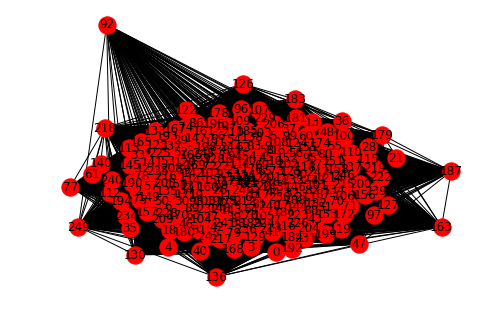

In [66]:
pos = nx.spring_layout(g)
nx.draw(g, pos = pos, with_labels=True)
#nx.draw_networkx_edge_labels(g, pos)
plt.show()

[0, 0, 1, 2, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 2, 0, 2, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 2, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0]


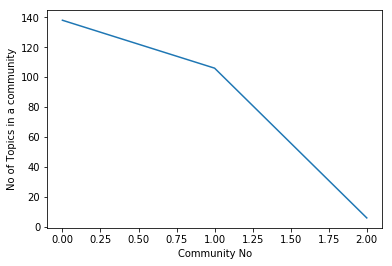

In [71]:
parts=community_louvain.best_partition(g)
values=[parts.get(node) for node in g.nodes()]
topic_comm=values
print(values)
from collections import Counter
c=Counter(parts.values())
plt.plot(c.keys(),c.values())
plt.xlabel('Community No')
plt.ylabel('No of Topics in a community')
plt.show()

In [73]:
'''path1=cwd+sym+'Saved_Items'+sym
with open(path1+'topic_community.pkl','wb') as f:
    pickle.dump(values,f)'''

"path1=cwd+sym+'Saved_Items'+sym\nwith open(path1+'topic_community.pkl','wb') as f:\n    pickle.dump(values,f)"